# Bounding ellipsoid notebook

In [1]:
import numpy as np
import test_image_ellipsoid as tie
import plot
import bounding_ellipsoid as be
import bounding_box as bb
import basic_functions as bf

## Test with small noise

Creation of an ellipsoidal test image with a = 100, b = 50, c = 30 and a noise amplitude of 10.   
The produced cloud of points is rotated by an angle of pi/7 around the x axis et pi/6 around the y axis

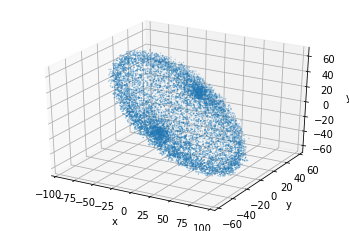

In [2]:
ellipsoid = {'a': 100, 'b': 50, 'c': 30}
aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=10.,
                                     angles=(np.pi/7., np.pi/6.))
ax = plot.scatter_plot(aggregate)

We can find the optimal bounding box

In [3]:
bb.bbox_volume(aggregate)
bbox = bb.bbox_optim(aggregate)
bbox

{'angles': array([-0.47516626, -0.51275312]), 'volume': 1584903.9124373212}

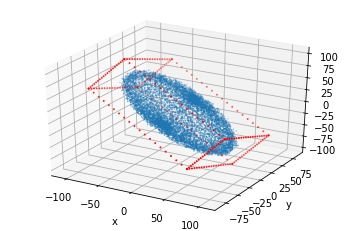

In [4]:
ax = plot.bbox_plot(aggregate, bbox)

We can rotate the aggregate in its preferred axis

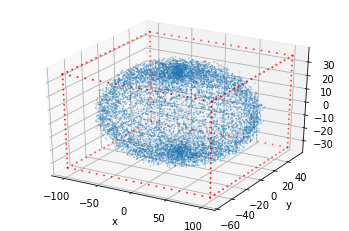

In [5]:
rotated_aggregate = bf.rotate_aggregate(aggregate, angles=bbox['angles'])
rotated_bbox = bb.compute_bbox(rotated_aggregate)
ax = plot.bbox_plot(rotated_aggregate, rotated_bbox)

We can find the bounding ellipsoid
**A remark: the algorithm is super slow for a dichotomy, you must do something wrong**

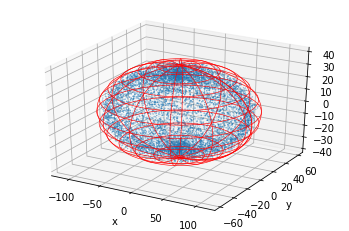

In [6]:
ellipsoid = be.bounding_ellipsoid_optim(aggregate)
ax = plot.fit_ellipsoid_plot(rotated_aggregate, ellipsoid)

## Test with big noise

Creation of an ellipsoidal test image with a = 100, b = 50, c = 30 and a noise amplitude of 30.   
The produced cloud of points is rotated by an angle of pi/7 around the x axis et pi/6 around the y axis

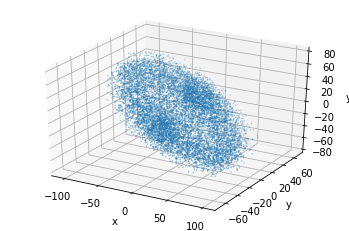

In [7]:
ellipsoid = {'a': 100, 'b': 50, 'c': 30}
aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=30.,
                                     angles=(np.pi/7., np.pi/6.))
ax = plot.scatter_plot(aggregate)

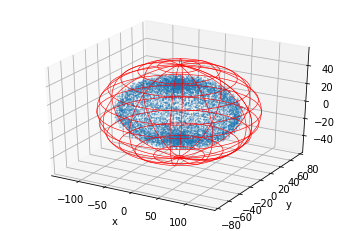

In [8]:
ellipsoid = be.bounding_ellipsoid_optim(aggregate, 1e-3)
rotated_ellipsoid = bf.rotate_aggregate(aggregate,
                                        angles=ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, ellipsoid)

## Test with ultra-big noise

Creation of an ellipsoidal test image with a = 100, b = 50, c = 30 and a noise amplitude of 1000.   
The produced cloud of points is rotated by an angle of pi/7 around the x axis et pi/6 around the y axis

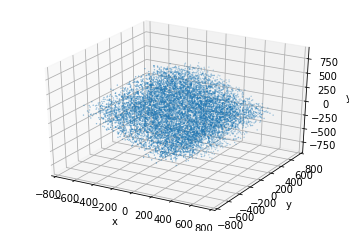

In [9]:
ellipsoid = {'a': 100, 'b': 50, 'c': 30}
aggregate = tie.ellipsoid_test_image(ellipsoid,
                                     npoints=10000,
                                     noise_amplitude=1000.,
                                     angles=(np.pi/7., np.pi/6.))

ax = plot.scatter_plot(aggregate)

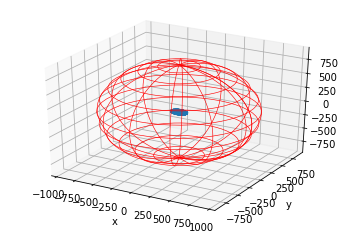

In [10]:
ellipsoid = be.bounding_ellipsoid_optim(aggregate)
rotated_ellipsoid = bf.rotate_aggregate(aggregate,
                                        angles=ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, ellipsoid)